In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
speed = np.array([12, 14.5, 10, 18, 8.5, 15, 22, 11, 13, 20.5, 24, 16, 12.5, 28, 9, 25, 14, 19, 10.5, 26.5, 15.5, 17])
ammo = np.array([0, 1, 2, 0, 4, 1, 0, 5, 2, 1, 2, 3, 0, 0, 6, 1, 4, 2, 2, 2, 5, 3])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])
X = np.column_stack((speed, ammo))
m_samples = len(y)
mean_speed = np.mean(speed)
std_speed = np.std(speed)
mean_ammo = np.mean(ammo)
std_ammo = np.std(ammo)
X_scaled = np.zeros_like(X)
X_scaled[:, 0] = (X[:, 0] - mean_speed) / std_speed
X_scaled[:, 1] = (X[:, 1] - mean_ammo) / std_ammo
X_design = np.c_[np.ones(m_samples), X_scaled]

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
def compute_cost(h, y):
    cost = (-1/m_samples) * (np.dot(y, np.log(h)) + np.dot((1-y), np.log(1-h)))
    return cost


In [16]:
alpha = 0.1
iterations = 2000
theta = np.zeros(3)
cost_history = []

for _ in range(iterations):
    z = np.dot(X_design, theta)
    h = sigmoid(z)
    gradient = np.dot(X_design.T, (h - y)) / m_samples
    theta -= alpha * gradient
    cost_history.append(compute_cost(h, y))

In [ ]:
test_speed = 25
test_ammo = 1

norm_speed = (test_speed - mean_speed) / std_speed
norm_ammo = (test_ammo - mean_ammo) / std_ammo

test_vector = np.array([1, norm_speed, norm_ammo])

prob = sigmoid(np.dot(test_vector, theta))
result = "SURVIVES" if prob >= 0.5 else "INFECTED"
print(f"Runner (25km/h, 1 Clip): {result}")
print(f"Survival Probability: {prob:.4f}")

Runner (25km/h, 1 Clip): SURVIVES
Survival Probability: 0.9995


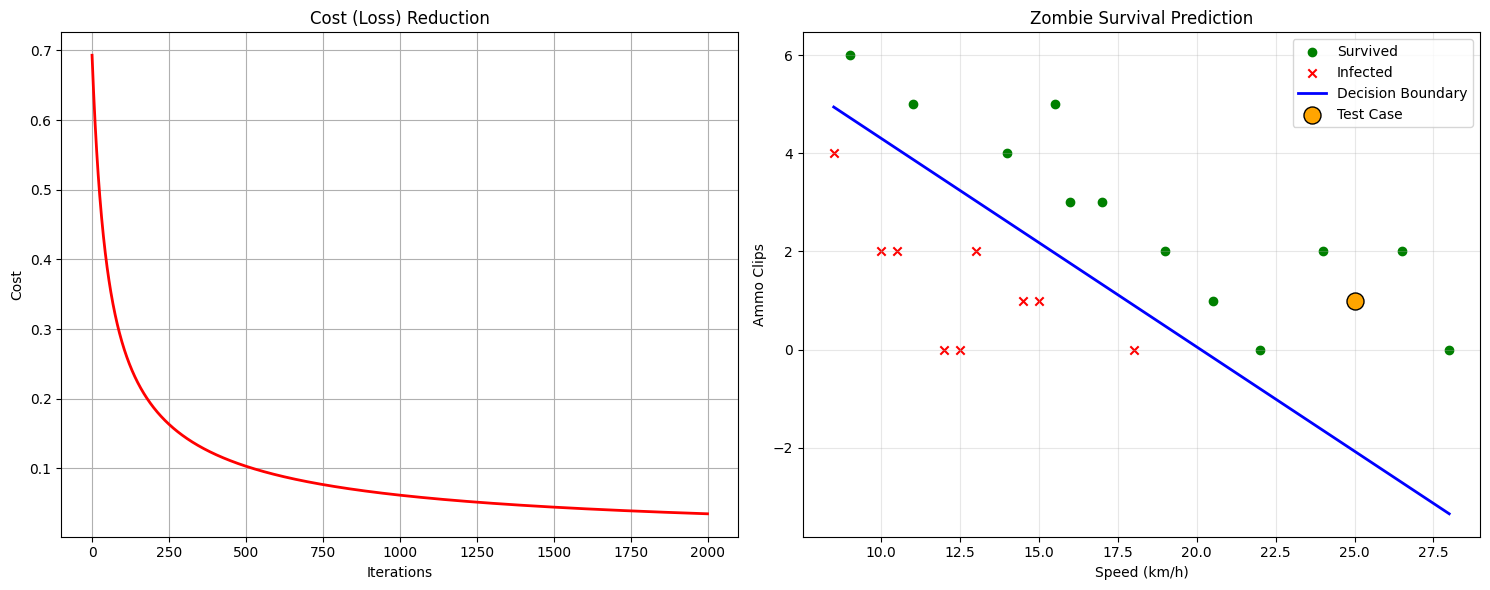

In [ ]:
plt.figure(figsize=(15, 6)) 

plt.subplot(1, 2, 1)
plt.plot(range(iterations), cost_history, color='red', linewidth=2)
plt.title('Cost (Loss) Reduction')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)

plt.subplot(1, 2, 2)
survived = y == 1
plt.scatter(speed[survived], ammo[survived], c='green', label='Survived', marker='o')
plt.scatter(speed[~survived], ammo[~survived], c='red', label='Infected', marker='x')
x_vals = np.array([np.min(speed), np.max(speed)])
x_vals_scaled = (x_vals - mean_speed) / std_speed
y_vals_scaled = -(theta[0] + theta[1]*x_vals_scaled) / theta[2]
y_vals = (y_vals_scaled * std_ammo) + mean_ammo
plt.plot(x_vals, y_vals, c='blue', linewidth=2, label='Decision Boundary')
plt.scatter(test_speed, test_ammo, c='orange', s=150, edgecolors='black', label='Test Case', zorder=5)
plt.xlabel('Speed (km/h)')
plt.ylabel('Ammo Clips')
plt.title('Zombie Survival Prediction')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()